# Shopify 2021 Fall Data Science Intern Challenge

## Question 1

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('data.csv')

In [3]:
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [6]:
df.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


Looking at the summary statistics, we see that the naive AOV calculation is simply the mean of all order amounts. Another thing to note here is that the standard deviation is really high, so I draw a boxplot of all order amounts.

<AxesSubplot:xlabel='order_amount'>

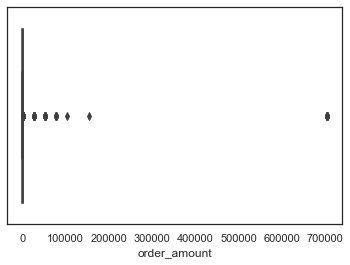

In [12]:
sns.set_style('white')
sns.boxplot(x='order_amount',data=df)

From the boxplot, it is clear that there are strong outliers driving up the average.

Now let's look at these extreme outliers.

In [15]:
outliers=df[df['order_amount']>700000]
outliers.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
1104,1105,42,607,704000,2000,credit_card,2017-03-24 4:00:00
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00


In [18]:
outliers.groupby('user_id').count()

,order_id,shop_id,order_amount,total_items,payment_method,created_at
user_id,,,,,,
607,17,17,17,17,17,17


In [19]:
outliers.groupby('shop_id').count()

,order_id,user_id,order_amount,total_items,payment_method,created_at
shop_id,,,,,,
42,17,17,17,17,17,17


It seems that these orders are identical with 2000 items in each order. These suspicious orders can be a result of data error; or maybe the shop owner is trying to increase reputation and sales by click farming. 

In [22]:
df.groupby('total_items').count()

,order_id,shop_id,user_id,order_amount,payment_method,created_at
total_items,,,,,,
1,1830,1830,1830,1830,1830,1830
2,1832,1832,1832,1832,1832,1832
3,941,941,941,941,941,941
4,293,293,293,293,293,293
5,77,77,77,77,77,77
6,9,9,9,9,9,9
8,1,1,1,1,1,1
2000,17,17,17,17,17,17


Let's go back to the original dataset. It seems that most orders have a resaonable number if items ranged from 1 to 8. 

In [23]:
df[df['total_items']==6]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
691,692,78,878,154350,6,debit,2017-03-27 22:51:43
1563,1564,91,934,960,6,debit,2017-03-23 8:25:49
2127,2128,83,745,774,6,cash,2017-03-27 6:59:46
2307,2308,61,723,948,6,credit_card,2017-03-26 11:29:37
3252,3253,67,706,786,6,credit_card,2017-03-29 16:05:41
3538,3539,43,830,1086,6,debit,2017-03-17 19:56:29
3865,3866,68,815,816,6,debit,2017-03-11 9:31:50
4711,4712,86,883,780,6,cash,2017-03-18 14:18:19
4847,4848,13,993,960,6,cash,2017-03-27 11:00:45


Then I check the orders with 6 items and find that they all haver different shop_id and user_id. These orders seem to be fine. Draw a box plot of order amount by total items.

<AxesSubplot:xlabel='total_items', ylabel='order_amount'>

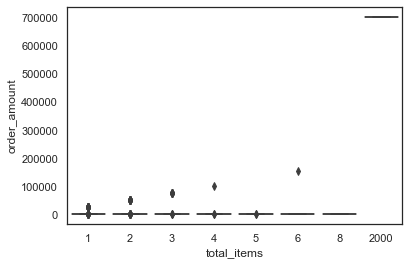

In [27]:
sns.boxplot(x='total_items',y='order_amount',data=df)

From the plot above, we see that there are still outliers in each group. Let's look at the max order amount in each group.

In [28]:
df.groupby('total_items').max()

,order_id,shop_id,user_id,order_amount,payment_method,created_at
total_items,,,,,,
1,4995,100,999,25725,debit,2017-03-30 9:27:00
2,5000,100,999,51450,debit,2017-03-30 9:40:40
3,4998,100,999,77175,debit,2017-03-30 8:50:40
4,4981,100,999,102900,debit,2017-03-30 9:55:00
5,4959,97,995,1760,debit,2017-03-30 6:20:07
6,4848,91,993,154350,debit,2017-03-29 16:05:41
8,4142,54,733,1064,debit,2017-03-07 17:05:18
2000,4883,42,607,704000,credit_card,2017-03-28 4:00:00


For group 1, 2, 3, 4 and 6, the max order amounts are multiples of 25725, which seems weird.

In [33]:
df['item_value']=df['order_amount']/df['total_items']

In [35]:
df[df['item_value']==25725].groupby('shop_id').count()

,order_id,user_id,order_amount,total_items,payment_method,created_at,item_value
shop_id,,,,,,,
78,46,46,46,46,46,46,46


In [42]:
df[df['item_value']==25725]['user_id'].nunique()

45

I create a new column item_value that represents the average value of an item in each order. Then I find that all the order amounts that are multiples of 25725 are from shop_id 78. The users who put orders in shop_id 78 are different though. Probably shop_id 78 is a luxury store that sells an expensive item. But these orders can still be suspicious.

### Solution 1: use medium instead of mean

Since there are extreme outliers driving up the AOV and some of the data we don't if they are true data, we can use medium instead of mean to avoid the impact of outliers.

In [47]:
df['order_amount'].describe()

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

The medium order value is 284.

### Solution 2: remove outliers

Since these orders are suspicious and have a strong impact of AOV, I first consider removing these orders.

In [43]:
df1=df[(df['total_items']!=2000)&(df['item_value']!=25725)]

In [44]:
df1.describe()

,order_id,shop_id,user_id,order_amount,total_items,item_value
count,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000
mean,2499.551347,49.846465,849.752279,302.580514,1.994734,151.788536
std,1444.069407,29.061131,86.840313,160.804912,0.982821,29.034215
min,1.000000,1.000000,700.000000,90.000000,1.000000,90.000000
25%,1248.000000,24.000000,775.000000,163.000000,1.000000,132.000000
50%,2497.000000,50.000000,850.000000,284.000000,2.000000,153.000000
75%,3751.000000,74.000000,925.000000,387.000000,3.000000,166.000000
max,5000.000000,100.000000,999.000000,1760.000000,8.000000,352.000000


The average of order amount after removing the outliers is 302.58.

### Solution 3: use item value

The dataset includes 100 stores from shopify, each only sells one model. We can use the average/medium of item value that better descirbes the price level on shopify.

In [48]:
df['item_value'].describe()

count     5000.000000
mean       387.742800
std       2441.963725
min         90.000000
25%        133.000000
50%        153.000000
75%        169.000000
max      25725.000000
Name: item_value, dtype: float64

In [49]:
df1['item_value'].describe()

count    4937.000000
mean      151.788536
std        29.034215
min        90.000000
25%       132.000000
50%       153.000000
75%       166.000000
max       352.000000
Name: item_value, dtype: float64

Same as before, if we want to avoid extreme outliers, we should consider using the medium. The medium of item value is 153. The average of item value after removing suspcious outliers is 151.79.

## Question 2

#### 2a. 54

SELECT count(orderid)
<br> FROM orders o JOIN shippers s
<br> on o.shipperID=s.shipperid
<br> where shippername='Speedy Express';

#### 2b. Peacock

SELECT lastname 
<br> FROM (select employeeid, count(orderid) as number
<br> FROM orders
<br> GROUP BY employeeid) o JOIN employees e
<br>on o.employeeid=e.employeeid
<br>order by number desc
<br>limit 1;

#### 2b. Boston crab meat

SELECT p.productid, productname, sum(quantity) as total FROM orders o, orderdetails od, customers c, products p
<br> WHERE o.orderid=od.orderid AND o.customerid=c.customerid AND od.productid=p.productid AND c.country="Germany"
<br> GROUP BY productname
<br> ORDER BY total DESC
LIMIT 1;